In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# Carregando o dataset
data_frame = pd.read_csv('/Users/Aluno/Desktop/mlsenac/machine-learning-senac/arquivos-aula11/pima-data.csv')

In [71]:
# Verificando o formato dos dados
data_frame.shape

(768, 10)

In [72]:
# Verificando as primeiras linhas do dataset
data_frame.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [73]:
# Verificando as ultimas linhas do dataset
data_frame.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [74]:
# Verificando se existem valores nulos
data_frame.isnull().values.any()

False

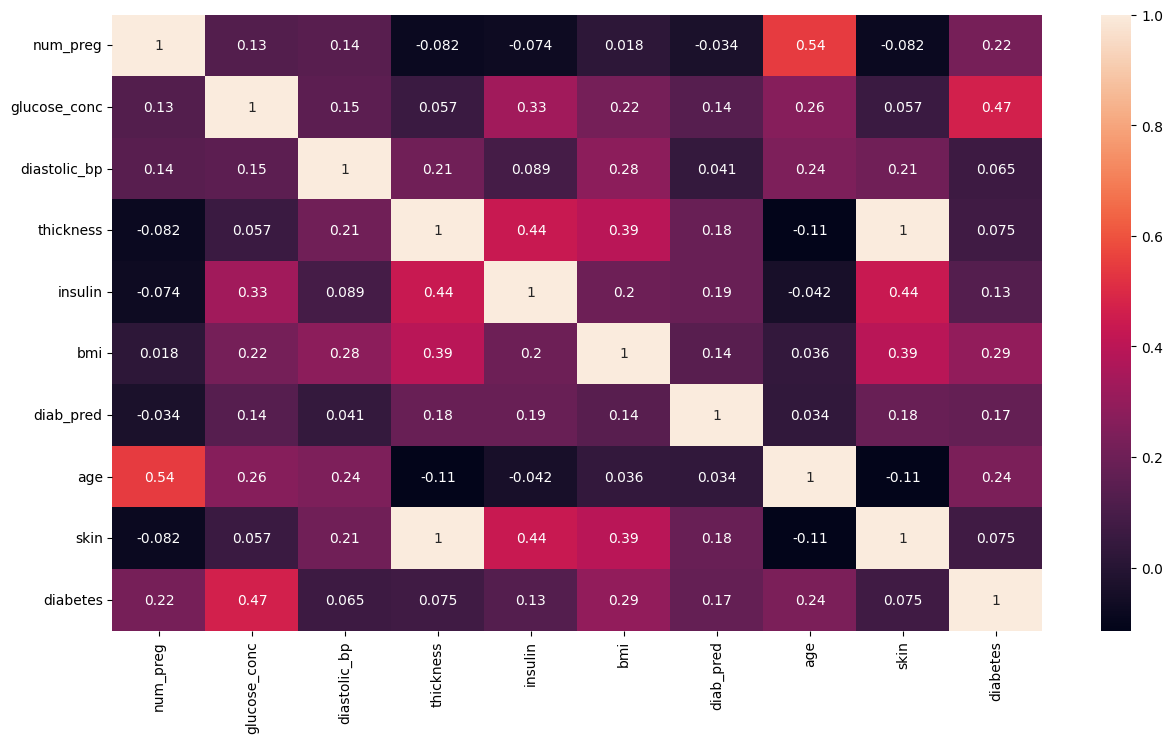

In [75]:
# Criando o gráfico
correlacao = data_frame.corr()
ax = sns.heatmap(correlacao, annot=True)
sns.color_palette('pastel')
ax.figure.set_size_inches(15, 8)

**Visualizando a correlação em tabela**

Coeficiente de correlação

1+ = forte correlação

0 = não há correlação

-1 = forte correlação negativa

In [76]:
data_frame.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081673,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057326,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436785,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392574,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183927,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113973,0.238356
skin,-0.081673,0.057326,0.207371,1.000000,0.436785,0.392574,0.183927,-0.113973,1.000000,0.074750
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074750,1.000000


In [77]:
# Definindo as classes
diabetes_map = {True: 1, False: 0}

In [78]:
# Aplicando o mapeamento ao dataset
data_frame['diabetes'] = data_frame['diabetes'].map(diabetes_map)

In [79]:
# Verificando o head
data_frame.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


Verificando como os dados estão disribuídos

In [80]:
num_true = len(data_frame.loc[data_frame['diabetes'] == True])
num_false = len(data_frame.loc[data_frame['diabetes'] == False])

print(f'Número de casos verdadeios: {num_true} ({num_true / (num_true + num_false) * 100:2.2f}%)')
print(f'Número de casos verdadeios: {num_false} ({num_false / (num_true + num_false) * 100:2.2f}%)')


Número de casos verdadeios: 268 (34.90%)
Número de casos verdadeios: 500 (65.10%)


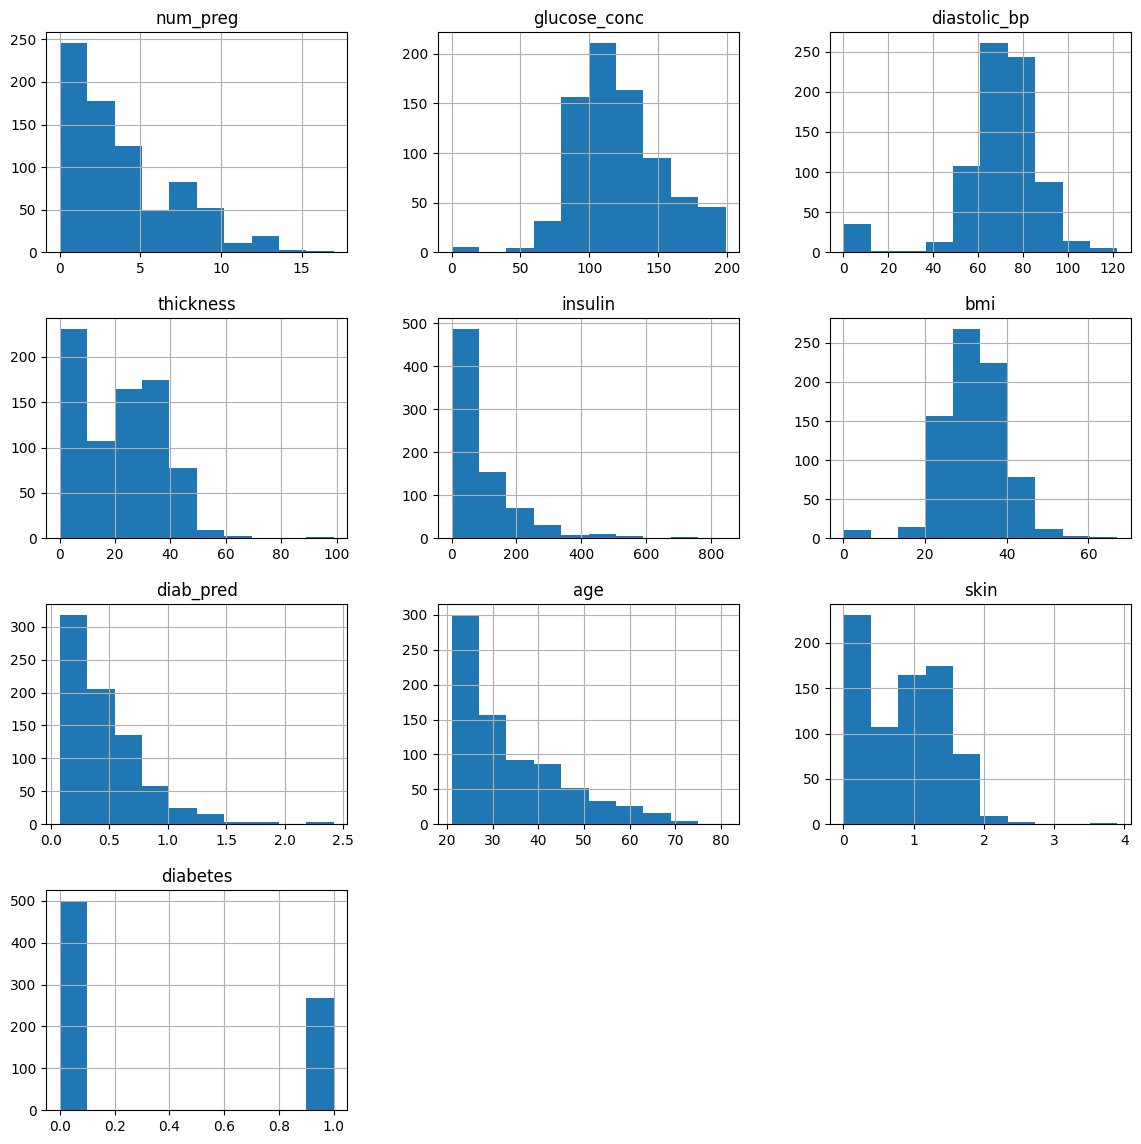

In [81]:
data_frame.hist(figsize=(14, 14))
plt.show()

### Spliting

80% para dados de treino e 20% para dados de teste

In [82]:
data_frame.shape

(768, 10)

In [83]:
import sklearn as sk
from sklearn.model_selection import train_test_split

In [84]:
# Seleção de variáveis preditoras (Feature Selection)
atributos = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']

In [85]:
# Variável a ser previsto
atrib_prev = ['diabetes']

In [86]:
# Criando objetos 
X = data_frame[atributos].values
Y = data_frame[atrib_prev].values

In [87]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [88]:
Y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [89]:
# Definando a taxa de split (Taxa de partição do conjuto de teste)
split_test_size = 0.2

In [90]:
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=split_test_size, shuffle=True, random_state=24)

In [91]:
perc_treino = (len(X_treino) / len(data_frame.index)) * 100
perc_treino = round(perc_treino, 2)
print(f'{perc_treino}% para os dados de treino.')

perc_teste = (len(X_teste) / len(data_frame.index)) * 100
perc_teste = round(perc_teste, 2)
print(f'{perc_teste}% para os dados de teste.')

79.95% para os dados de treino.
20.05% para os dados de teste.


### Valores Missing Ocultos

In [92]:
# Verificando se existem valores nulos
data_frame.isnull().values.any()

False

In [93]:
data_frame.head(10)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1
5,5,116,74,0,0,25.6,0.201,30,0.0000,0
6,3,78,50,32,88,31.0,0.248,26,1.2608,1
7,10,115,0,0,0,35.3,0.134,29,0.0000,0
8,2,197,70,45,543,30.5,0.158,53,1.7730,1
9,8,125,96,0,0,0.0,0.232,54,0.0000,1


#### Valores missing

In [94]:
#print(f'Linhas no dataframe {len(data_frame)}')
#print(f'Linhas missing glucose_conc: {len(data_frame.loc[])}')

#### Tratando dados missing - impute

Substituindo os valores iguais a zero, pela média dos dados

In [95]:
from sklearn.impute import SimpleImputer

In [96]:
# Criando objeto 
imput_media = SimpleImputer(missing_values=0, strategy='mean')

# Substituindo os valores iguais a zero, pela média dos dados
X_treino = imput_media.fit_transform(X_treino)
X_teste = imput_media.fit_transform(X_teste)

In [97]:
# Utilizando um classificador Naive Bayes

from sklearn.naive_bayes import GaussianNB

In [98]:
# Criando modelo preditivo
modelo1 = GaussianNB()

In [99]:
# Treinando o modelo
modelo1.fit(X_treino, Y_treino.ravel())

GaussianNB()

Verificando a exatidão no modelo nos dados de teste

In [100]:
from sklearn import metrics

In [101]:
nb_predict_test = modelo1.predict(X_teste)
nb_predict_test

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0],
      dtype=int64)

In [102]:
nb_acc_test = metrics.accuracy_score(Y_teste, nb_predict_test)

In [105]:
nb_acc_test = round(nb_acc_test, 2) * 100
nb_acc_test

73.0

In [106]:
print(f'Exatidão (Accuracy): {nb_acc_test}%')

Exatidão (Accuracy): 73.0%


**Métricas**

In [107]:
print(metrics.classification_report(Y_teste, nb_predict_test))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81        98
           1       0.68      0.50      0.58        56

    accuracy                           0.73       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.73      0.72       154



Otimizando com Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
modelo2 = RandomForestClassifier(random_state= 24)
modelo2.fit(X_treino, Y_treino.ravel())

RandomForestClassifier(random_state=24)

In [110]:
# Verificando os dados de treino
rf_predict_train = modelo2.predict(X_treino)
rf_ac_treino = metrics.accuracy_score(Y_treino, rf_predict_train)

print(f'Exatidão: {rf_ac_treino:.4f}')

Exatidão: 1.0000


In [111]:
# Verificando nos dados de teste
rf_predict_test = modelo2.predict(X_teste)
rf_ac_test = metrics.accuracy_score(Y_teste, rf_predict_test)

print(f'Accuracy: {rf_ac_test:.4f}')

Accuracy: 0.7273


In [112]:
print(metrics.classification_report(Y_teste, rf_predict_test))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        98
           1       0.65      0.54      0.59        56

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154



Regressão Logística

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
# Terceira versão do modelo usando Regressão Logistica

modelo3 = LogisticRegression(C= 0.5, random_state= 42, max_iter= 100)
modelo3.fit(X_treino, Y_treino.ravel())
lr_predict_test = modelo3.predict(X_teste)

C:\Users\Aluno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [116]:
ac_teste_rl = metrics.accuracy_score(Y_teste, lr_predict_test)

print(f'Accuracy: {ac_teste_rl:.4f}')

Accuracy: 0.7143


In [117]:
print(metrics.classification_report(Y_teste, lr_predict_test))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80        98
           1       0.68      0.41      0.51        56

    accuracy                           0.71       154
   macro avg       0.70      0.65      0.65       154
weighted avg       0.71      0.71      0.69       154



In [118]:
print(f'Modelo usando algoritmo Naive Bayes: {nb_acc_test}%')
print(f'Modelo usando algoritmo Random Forest: {round(rf_ac_test, 2) * 100}%')
print(f'Modelo usando algoritmo Regressão Logística: {round(ac_teste_rl, 2 ) * 100}%')

Modelo usando algoritmo Naive Bayes: 73.0%
Modelo usando algoritmo Random Forest: 73.0%
Modelo usando algoritmo Regressão Logística: 71.0%
